In [1]:
from model import efficientdet

In [2]:
model,box=efficientdet(phi=0,num_classes=1,weighted_bifpn=True,freeze_bn=True)

In [25]:
%pwd

'/home/shivam/Documents/project/secondtry/EfficientDet'

In [3]:
path='model/new/w2-5.h5' 
box.load_weights(path,by_name=True)

0.05124330520629883
(1,)
score :  [0.9615921]


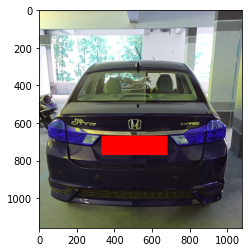

0.044754743576049805
(1,)
score :  [0.89665335]


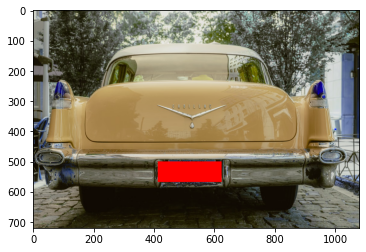

0.08170390129089355
(1,)
score :  [0.99625695]


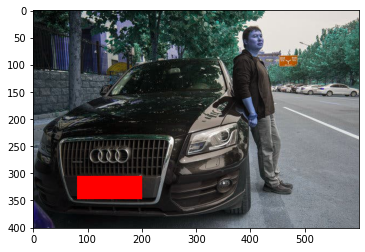

0.05305337905883789
(1,)
score :  [0.8050524]


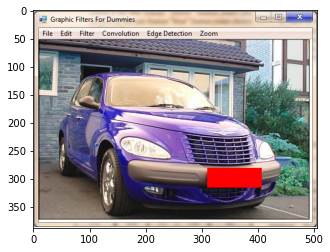

In [9]:
import cv2
import numpy as np
from utils import preprocess_image,postprocess_boxes
from utils.draw_boxes import draw_boxes
import time
import os
import matplotlib.pyplot as plt


os.environ['CUDA_VISIBLE_DEVICES'] = '0'

files=['lp1.jpg','lp2.jpeg','lp3.jpg','lp4.jpg']

for i,file in enumerate(files):

    image=cv2.imread(file)
    img=image.copy()
    img=img[:,:,::-1]
    h,w=img.shape[:2]
    img,scale=preprocess_image(img,image_size=512)

    start = time.time()
    boxes, scores, labels = box.predict_on_batch([np.expand_dims(img, axis=0)])
    boxes, scores, labels = np.squeeze(boxes.numpy()), np.squeeze(scores), np.squeeze(labels)
    print(time.time() - start)

    boxes = postprocess_boxes(box=boxes, scale=scale, height=h, width=w)
    indices = np.where(scores[:] > 0.3)[0]
    print(indices.shape)
    print('score : ',scores[indices])
    boxes = boxes[indices]
    labels = labels[indices]
    colors = [[255,0,0]]
    classes= {0:'license_plate'}
    draw_boxes(image, boxes, scores, labels, colors,classes)
    plt.imshow(image)
    plt.savefig('output/{}.png'.format(i))
    plt.show()


#cv2.namedWindow('image', cv2.WINDOW_NORMAL)
#cv2.imshow('image',image)
#cv2.waitKey(0)
